# Matplotlib Components

There are several components of a Matplotlib figure. Understanding
how each of these fit together will give us better control over our
visualizations. This is important when we want to present our work
in papers, but it will also help us debug things when the default
settings for figures don't quite come out right. Let's take a look
at what is known as the object oriented interface of Matplotlib.

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

# Alternative bit of magic to create interactive plots
# %matplotlib notebook

## Figure

This is the container that holds the various features of our plots. 
It keeps track of all the figure's `Axes`, legends, titles, and the canvas object.

In [3]:
# an empty figure with no Axes
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

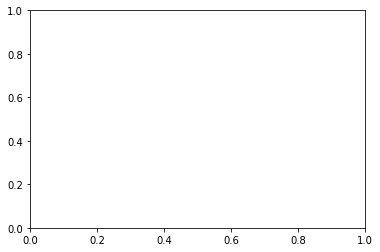

In [4]:
# a figure with a single Axes
fig, axs = plt.subplots()

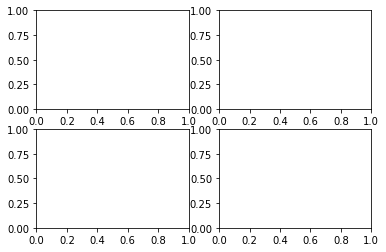

In [5]:
# 2x2 grid of subfigures
fig, axs = plt.subplots(2, 2) 

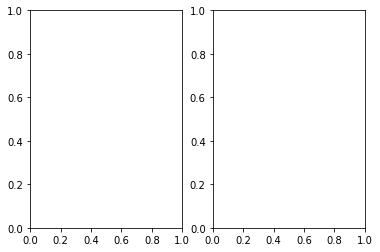

In [6]:
# 1 row, two columns
fig, axs = plt.subplots(1, 2) 

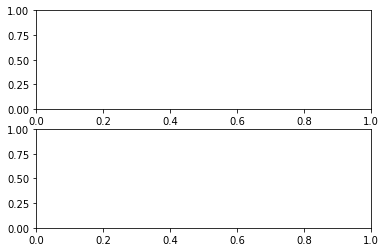

In [7]:
# 2 rows, 1 column
fig, axs = plt.subplots(2, 1) 

### Note:

Be careful of state when working in these notebooks! See how `matplotlib.pyplot` is creating figures and axes each time it is called? We are overriding state in each of these calls. This can be pretty dangerous when you are bouncing back and forth from previous notebook cells. 

## Axes

Axes are what we would consider the "plot" of our figure. They hold onto the data
that we are plotting. A `Figure` can have zero or many `Axes`, and each `Axes` (this is
a weird singular form) is associated with just one `Figure`.